### Importing libraries and downloading dependencies

In [23]:
import pandas as pd
import os
from pathlib import Path
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle
import pyLDAvis
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from datasets.load import requests
from pypdf import PdfReader

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alejandro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading files of interest

In [28]:
def extract_documents_from_pdf(url):

    #output_path = os.path.join(static_dir, 'text') + "/temp"
    print(url)

    response = requests.get(url)
    contentType = response.headers.get('content-type')
    print(contentType)
    with open('temp.pdf', 'wb') as f:
            f.write(response.content)

    if 'pdf' in contentType.lower():
        with open(output_path, 'rb') as f:
            pdf_reader = PdfReader(f)
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                yield page.extract_text()
    elif 'text' in contentType.lower():
        content = response.content.decode('utf-8')
        yield content
url = 'https://procrastinatingbucket.sgp1.cdn.digitaloceanspaces.com/Procrastinate/Procrastinate%20jane12/speechToText/529e59c9'
docs = list(extract_documents_from_pdf(url))
print(docs)

https://procrastinatingbucket.sgp1.cdn.digitaloceanspaces.com/Procrastinate/Procrastinate%20jane12/speechToText/529e59c9
text/plain
[' This is a sample file for the speech-to-text notebook. This is meant as a test audio to try out whether Whisper works to actually decode the audio into word tokens. Check. Check. One, two, three, four. Zero. Over.']


In [56]:
def extract_documents_from_pdf(url):
    response = requests.get(url)
    with open('temp_pdf.pdf', 'wb') as f:
        f.write(response.content)

    with open('temp_pdf.pdf', 'rb') as f:
        pdf_reader = PdfReader(f)
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            yield page.extract_text()
            
url = 'https://procrastinatingbucket.sgp1.cdn.digitaloceanspaces.com/Procrastinate/Procrastinate%20jane12/upload/0e726bf2'
docs = list(extract_documents_from_pdf(url))

In [57]:
print(len(docs))
print(docs[0][:500])

11
 All right, welcome to our first lecture on computer graphics. Today we're just going to do an 
overview of computer graphics with two main objectives. One is to try to understand broadly what 
computer graphics is all about, where does it show up in the world, and we're actually also going to 
really get our hands on a first algorithm for making images from 3D shapes. Also, I should say, all 
information about course logistics is on the webpage. Today, I'm really going to is on the webpage. 
To


In [38]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

print(docs[0][:500])

['all', 'right', 'welcome', 'to', 'our', 'first', 'lecture', 'on', 'computer', 'graphics', 'today', 'we', 're', 'just', 'going', 'to', 'do', 'an', 'overview', 'of', 'computer', 'graphics', 'with', 'two', 'main', 'objectives', 'one', 'is', 'to', 'try', 'to', 'understand', 'broadly', 'what', 'computer', 'graphics', 'is', 'all', 'about', 'where', 'does', 'it', 'show', 'up', 'in', 'the', 'world', 'and', 'we', 're', 'actually', 'also', 'going', 'to', 'really', 'get', 'our', 'hands', 'on', 'first', 'algorithm', 'for', 'making', 'images', 'from', '3d', 'shapes', 'also', 'should', 'say', 'all', 'information', 'about', 'course', 'logistics', 'is', 'on', 'the', 'webpage', 'today', 'really', 'going', 'to', 'is', 'on', 'the', 'webpage', 'today', 'really', 'gonna', 'dive', 'into', 'the', 'content', 'okay', 'so', 'what', 'is', 'computer', 'graphics', 'why', 'are', 'we', 'here', 'what', 'do', 'we', 'want', 'to', 'talk', 'about', 'this', 'semester', 'when', 'you', 'think', 'about', 'computer', 'graphi

In [39]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

print(docs[0][:500])

['all', 'right', 'welcome', 'to', 'our', 'first', 'lecture', 'on', 'computer', 'graphic', 'today', 'we', 're', 'just', 'going', 'to', 'do', 'an', 'overview', 'of', 'computer', 'graphic', 'with', 'two', 'main', 'objective', 'one', 'is', 'to', 'try', 'to', 'understand', 'broadly', 'what', 'computer', 'graphic', 'is', 'all', 'about', 'where', 'doe', 'it', 'show', 'up', 'in', 'the', 'world', 'and', 'we', 're', 'actually', 'also', 'going', 'to', 'really', 'get', 'our', 'hand', 'on', 'first', 'algorithm', 'for', 'making', 'image', 'from', '3d', 'shape', 'also', 'should', 'say', 'all', 'information', 'about', 'course', 'logistics', 'is', 'on', 'the', 'webpage', 'today', 'really', 'going', 'to', 'is', 'on', 'the', 'webpage', 'today', 'really', 'gonna', 'dive', 'into', 'the', 'content', 'okay', 'so', 'what', 'is', 'computer', 'graphic', 'why', 'are', 'we', 'here', 'what', 'do', 'we', 'want', 'to', 'talk', 'about', 'this', 'semester', 'when', 'you', 'think', 'about', 'computer', 'graphic', 'prob

In [54]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=2, no_above=0.5)

2024-04-22 14:22:43,134 : INFO : adding document #0 to Dictionary<0 unique tokens: []>


TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [46]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(docs[0][:500])

Number of unique tokens: 439
Number of documents: 11
['all', 'right', 'welcome', 'to', 'our', 'first', 'lecture', 'on', 'computer', 'graphic', 'today', 'we', 're', 'just', 'going', 'to', 'do', 'an', 'overview', 'of', 'computer', 'graphic', 'with', 'two', 'main', 'objective', 'one', 'is', 'to', 'try', 'to', 'understand', 'broadly', 'what', 'computer', 'graphic', 'is', 'all', 'about', 'where', 'doe', 'it', 'show', 'up', 'in', 'the', 'world', 'and', 'we', 're', 'actually', 'also', 'going', 'to', 'really', 'get', 'our', 'hand', 'on', 'first', 'algorithm', 'for', 'making', 'image', 'from', '3d', 'shape', 'also', 'should', 'say', 'all', 'information', 'about', 'course', 'logistics', 'is', 'on', 'the', 'webpage', 'today', 'really', 'going', 'to', 'is', 'on', 'the', 'webpage', 'today', 'really', 'gonna', 'dive', 'into', 'the', 'content', 'okay', 'so', 'what', 'is', 'computer', 'graphic', 'why', 'are', 'we', 'here', 'what', 'do', 'we', 'want', 'to', 'talk', 'about', 'this', 'semester', 'when', 

In [50]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2024-04-22 14:18:43,545 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-04-22 14:18:43,547 : INFO : using serial LDA version on this node
2024-04-22 14:18:43,548 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 11 documents, updating model once every 11 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2024-04-22 14:18:43,548 : INFO : PROGRESS: pass 0, at document #11/11
2024-04-22 14:18:43,575 : INFO : optimized alpha [0.06439704, 0.05027295, 0.05060598, 0.050340343, 0.113923244, 0.036868192, 0.050656147, 0.036868103, 0.09003396, 0.063718684]
2024-04-22 14:18:43,577 : INFO : topic #7 (0.037): 0.002*"cube" + 0.002*"line" + 0.002*"coordinate" + 0.002*"dimensional" + 0.002*"people" + 0.002*"color" + 0.002*"why" + 0.002*"visual" + 0.002*"change" + 0.002*"even"
2024-04-22 14:18:43,577 : INFO : topic #5 (0.037): 0.002*"line" + 0.0

In [51]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.2024.
[([(0.002277904, 'enough'),
   (0.002277904, 'computational'),
   (0.002277904, 'centered'),
   (0.002277904, 'describe'),
   (0.002277904, 'connect'),
   (0.002277904, 'encoding'),
   (0.002277904, 'origin'),
   (0.002277904, 'equation'),
   (0.002277904, 'floating'),
   (0.002277904, 'forth'),
   (0.002277904, 'generalize'),
   (0.002277904, 'generate'),
   (0.002277904, 'hardware'),
   (0.002277904, 'integer'),
   (0.002277904, 'mean'),
   (0.002277904, 'most'),
   (0.002277904, 'notice'),
   (0.002277904, 'encode'),
   (0.002277904, 'concrete'),
   (0.002277904, 'position')],
  -0.5994401564311256),
 ([(0.002277904, 'enough'),
   (0.002277904, 'computational'),
   (0.002277904, 'centered'),
   (0.002277904, 'describe'),
   (0.002277904, 'connect'),
   (0.002277904, 'encoding'),
   (0.002277904, 'origin'),
   (0.002277904, 'equation'),
   (0.002277904, 'floating'),
   (0.002277904, 'forth'),
   (0.002277904, 'generalize'),
   (0.002277904, 'generate

### Performing preprocessing on the content of the text

### Visualizing the result of the preprocessing

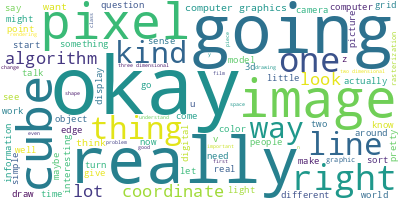

In [63]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color="steelblue")

# Generating a single word cloud
wordcloud.generate(case_lowered)

# Visualizing the word cloud
wordcloud.to_image()

In [69]:
fillers_removed_docs = []

for doc in docs:
    fillers_removed_doc = re.sub(
        r'\b(?:okay|right|going|thing|kind|really|thing|one|lot|see|look|might|actually|now|different|pretty|think|kind|maybe|want|need|understand|well|like|little|could|say|also|all|can|will|welcome|our|first|lecture|to|up|try|broadly|where|is|about|the|just|do|get)\b',
        '',
        doc
    )
    fillers_removed_docs.append(fillers_removed_doc)
print(fillers_removed_docs)

[" All ,      on computer graphics. Today we're     an \noverview of computer graphics with two main objectives. One       what \ncomputer graphics   ,  does it show  in  world, and we're     \n   hands on a  algorithm for making images from 3D shapes. Also, I should ,  \ninformation  course logistics  on  webpage. Today, I'm     on  webpage. \nToday I'm  gonna dive into  content. Okay, so what  computer graphics? Why are we \nhere? What  we   talk  this semester? When you   computer graphics, \nprobably an image  this  comes  mind, something from  an animated movie, visual \neffects. But what we    study in this class more fundamentally  how computer \ngraphics shows   in computer science, what its function  in digital computation, and why  \nwe  it. So if we  back   earliest computers, they looked something  this, these \nhuge machines that took  an entire room. And  way that you  interface with these \nmachines was very crude. You  have  punch holes in a card that gets fed into  com

### Removing fillers since there are a lot of them in spoken texts

In [67]:
fillers_removed = re.sub('\\b(?:okay|right|going|thing|kind|really|thing|one|lot|see|look|might|actually|now|different|pretty|think|kind|maybe|want|need|understand|well|like|little|could|say|also|all|can|will|welcome|our|first|lecture|to|up|try|broadly|where|is|about|the|just|do|get)\\b', '', docs)
print(fillers_removed)

TypeError: expected string or bytes-like object

### Checking the wordcloud again

In [49]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color="steelblue")
wordcloud.generate(docs)
wordcloud.to_image()

TypeError: expected string or bytes-like object

### Preparing the corpus for LDA Analysis

In [66]:
stop_words = stopwords.words("english")
stop_words.extend(["from", "subject", "re", "edu", "use"])

def sent_to_words(sentence):
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = fillers_removed
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words)

[['computer', 'graphics', 'today', 'overview', 'computer', 'graphics', 'two', 'main', 'objectives', 'computer', 'graphics', 'show', 'world', 'hands', 'algorithm', 'making', 'images', 'shapes', 'information', 'course', 'logistics', 'webpage', 'today', 'webpage', 'today', 'gonna', 'dive', 'content', 'computer', 'graphics', 'talk', 'semester', 'computer', 'graphics', 'probably', 'image', 'comes', 'mind', 'something', 'animated', 'movie', 'visual', 'effects', 'study', 'class', 'fundamentally', 'computer', 'graphics', 'shows', 'computer', 'science', 'function', 'digital', 'computation', 'back', 'earliest', 'computers', 'looked', 'something', 'huge', 'machines', 'took', 'entire', 'room', 'way', 'interface', 'machines', 'crude', 'punch', 'holes', 'card', 'gets', 'fed', 'computer', 'calculation', 'spits', 'card', 'holes', 'punched', 'takes', 'time', 'obviously', 'set', 'program', 'interpret', 'results', 'came', 'computer', 'must', 'better', 'way', 'digital', 'information', 'form', 'form', 'dig

### Corpus creation

In [67]:
# Creating a dictionary
id2word = corpora.Dictionary(data_words)

# Creating Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Checking
print(corpus)

2024-04-22 13:27:49,379 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-04-22 13:27:49,385 : INFO : built Dictionary<1250 unique tokens: ['ab', 'ability', 'able', 'abstract', 'abstraction']...> from 1 documents (total 3721 corpus positions)
2024-04-22 13:27:49,387 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<1250 unique tokens: ['ab', 'ability', 'able', 'abstract', 'abstraction']...> from 1 documents (total 3721 corpus positions)", 'datetime': '2024-04-22T13:27:49.386992', 'gensim': '4.3.2', 'python': '3.10.14 (main, Mar 21 2024, 16:24:04) [GCC 11.2.0]', 'platform': 'Linux-6.5.0-10031-tuxedo-x86_64-with-glibc2.35', 'event': 'created'}


[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 4), (17, 1), (18, 26), (19, 3), (20, 3), (21, 11), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 4), (28, 5), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 5), (39, 3), (40, 8), (41, 8), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 2), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 1), (57, 12), (58, 1), (59, 1), (60, 1), (61, 1), (62, 5), (63, 1), (64, 2), (65, 1), (66, 1), (67, 2), (68, 3), (69, 1), (70, 1), (71, 2), (72, 1), (73, 7), (74, 2), (75, 3), (76, 4), (77, 3), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 3), (85, 5), (86, 4), (87, 2), (88, 3), (89, 2), (90, 1), (91, 1), (92, 1), (93, 3), (94, 6), (95, 4), (96, 11), (97, 1), (98, 11), (99, 1), (100, 3), (101, 1), (102, 2), (103, 2), (104, 2), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (11

### LDA Model Training

In [51]:
# We are choosing the top 5 topics to show here
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"computer" + 0.010*"image" + 0.010*"graphics" + 0.009*"cube" + '
  '0.007*"line" + 0.007*"way" + 0.007*"information" + 0.006*"two" + '
  '0.006*"pixel" + 0.006*"things"'),
 (1,
  '0.010*"computer" + 0.010*"information" + 0.008*"graphics" + 0.007*"line" + '
  '0.007*"way" + 0.007*"cube" + 0.007*"digital" + 0.006*"image" + '
  '0.006*"things" + 0.006*"pixel"'),
 (2,
  '0.013*"computer" + 0.010*"graphics" + 0.009*"cube" + 0.009*"digital" + '
  '0.008*"image" + 0.008*"information" + 0.007*"line" + 0.007*"way" + '
  '0.006*"pixel" + 0.006*"algorithm"'),
 (3,
  '0.012*"computer" + 0.008*"cube" + 0.008*"graphics" + 0.005*"digital" + '
  '0.005*"way" + 0.005*"line" + 0.005*"something" + 0.005*"image" + '
  '0.004*"information" + 0.004*"two"'),
 (4,
  '0.019*"computer" + 0.012*"cube" + 0.011*"graphics" + 0.008*"way" + '
  '0.008*"image" + 0.007*"two" + 0.007*"line" + 0.007*"information" + '
  '0.007*"things" + 0.006*"let"'),
 (5,
  '0.013*"computer" + 0.009*"graphics" + 0.008*"cub

In [68]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.


model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2024-04-22 13:28:05,460 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-04-22 13:28:05,461 : INFO : using serial LDA version on this node
2024-04-22 13:28:05,463 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 1 documents, updating model once every 1 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2024-04-22 13:28:05,463 : INFO : PROGRESS: pass 0, at document #1/1
2024-04-22 13:28:05,497 : INFO : optimized alpha [0.18079647, 0.18017387, 0.021142028, 0.17295864, 0.021141917, 0.17409089, 0.18051189, 0.16877714, 0.19746965, 0.18745422]
2024-04-22 13:28:05,498 : INFO : topic #2 (0.021): 0.001*"computer" + 0.001*"graphics" + 0.001*"image" + 0.001*"digital" + 0.001*"information" + 0.001*"way" + 0.001*"cube" + 0.001*"pixel" + 0.001*"dimensional" + 0.001*"let"
2024-04-22 13:28:05,499 : INFO : topic #4 (0.021): 0.001*"computer" + 0

In [69]:
top_topics = lda_model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: 0.0000.
[([(0.012562805, 'computer'),
   (0.010204984, 'image'),
   (0.009596331, 'graphics'),
   (0.008598695, 'cube'),
   (0.007461394, 'line'),
   (0.007110211, 'way'),
   (0.0068932883, 'information'),
   (0.0063233515, 'two'),
   (0.006011839, 'pixel'),
   (0.005738418, 'things'),
   (0.005648317, 'algorithm'),
   (0.0055350806, 'something'),
   (0.005196898, 'digital'),
   (0.004998929, 'draw'),
   (0.004748872, 'dimensional'),
   (0.0042427387, 'camera'),
   (0.0041410974, 'coordinates'),
   (0.004034698, 'talk'),
   (0.003984576, 'go'),
   (0.0039090663, 'visual')],
  1.0000889005818406e-12),
 ([(0.010192242, 'computer'),
   (0.009561972, 'information'),
   (0.007953916, 'graphics'),
   (0.0071873884, 'line'),
   (0.007024513, 'way'),
   (0.006903638, 'cube'),
   (0.006564757, 'digital'),
   (0.0058364356, 'image'),
   (0.0057616695, 'things'),
   (0.005543462, 'pixel'),
   (0.0054048197, 'dimensional'),
   (0.004928553, 'two'),
   (0.0048016333, 'algor

### Visualizing the topics

In [32]:
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(parent_path, "summarised_output/lda_prepared_"+str(num_topics)).replace("\\", "/")

# This is the expensive bit, make the Turn self_prep_viz = True if you wanna execute viz prep yourself

self_prep_viz = True

if self_prep_viz:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, "wb") as f:
        pickle.dump(LDAvis_prepared, f)

# Loading the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, "rb") as f:
    LDAvis_prepared = pickle.load(f)

html_file_path = os.path.join(parent_path, "summarised_output/ldavis_prepared_"+str(num_topics)+".html").replace("\\", "/")

pyLDAvis.save_html(LDAvis_prepared, html_file_path)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.034013 -0.000512       1        1  99.975807
1     -0.022503  0.000230       2        1   0.002688
8     -0.019775  0.002239       3        1   0.002688
9     -0.019065 -0.001565       4        1   0.002688
3     -0.004910 -0.000326       5        1   0.002688
5      0.002238 -0.000205       6        1   0.002688
0      0.010833 -0.000201       7        1   0.002688
7      0.012094  0.001569       8        1   0.002688
2      0.012380 -0.001217       9        1   0.002688
6      0.062722 -0.000011      10        1   0.002688, topic_info=          Term      Freq      Total Category  logprob  loglift
204   computer  55.00000  55.000000  Default  30.0000  30.0000
488   graphics  45.00000  45.000000  Default  29.0000  29.0000
255       cube  44.00000  44.000000  Default  28.0000  28.0000
542      image  42.00000  42.000000  Default  27.0000  27.0000
618       line  31.00000  31.000000  Default  26.0000  26.0000
...        ...       ...        ...      ...      ...      ...
620      lines   0.00008  11.160131  Topic10  -7.1309  -1.3215
688     models   0.00008  11.820217  Topic10  -7.1309  -1.3790
771     people   0.00008  14.744320  Topic10  -7.1309  -1.6000
1101      talk   0.00008  22.502748  Topic10  -7.1309  -2.0228
134     camera   0.00008  15.634491  Topic10  -7.1309  -1.6586

[725 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
16        1  0.902148            ahead
18        1  0.989784        algorithm
20        1  0.813390  algorithmically
41        1  0.996473           answer
49        1  0.953869            apply
...     ...       ...              ...
1234      1  1.023548            world
1235      1  1.002411           worlds
1237      1  1.020661            would
1242      1  0.956673            wrong
1246      1  0.926221              yes

[201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 9, 10, 4, 6, 1, 8, 3, 7])